### Question 1

In [1]:
from PIL import Image
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as img

(-0.5, 1279.5, 824.5, -0.5)

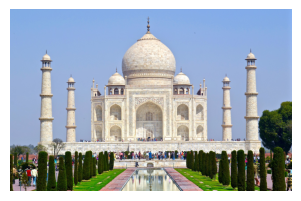

In [2]:
image = Image.open(r'tajMahal.jpg')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

#### Gaussian Noise

In [3]:
og_pixels = np.array(image) #convert picture to numpy array to make it subscriptable
gaussian_noise = np.random.normal(0, 100, og_pixels.shape) # Generate noise
noisy_img1 = og_pixels + gaussian_noise
gaussian_img = np.clip(noisy_img1, 0, 255).astype(np.uint8) #Clip pxl value to be bw [0,255]

(-0.5, 1279.5, 824.5, -0.5)

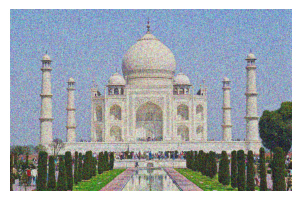

In [4]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(gaussian_img)
plt.axis('off')

#### Salt and Pepper Noise

In [5]:
img_size = og_pixels.size #no of pixels in the image
noise_percentage = 0.8  # Set the percentage of pixels that should contain noise as 50%
noise_size = int(noise_percentage*img_size)# Determine size of noise based on noise %age
random_indices = np.random.choice(img_size, noise_size) # Randomly select indices for adding noise.

saltpepper_img = og_pixels.copy() # Create a copy of the original image
# Create a noise list with random placements of min and max values of the image pixels.
noise = np.random.choice([og_pixels.min(), og_pixels.max()], noise_size)
'''
Replace the values of the templated noised image at random indices with the noise, 
to obtain the final noised image.'''
saltpepper_img.flat[random_indices] = noise

(-0.5, 1279.5, 824.5, -0.5)

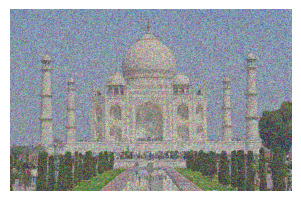

In [6]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(saltpepper_img)
plt.axis('off')

### Uniform Noise

Contrary to Gaussian noise, Uniform noise is a signal dependent that follows a uniform distribution. It is caused by the quantization of the pixels of an image to a number of discrete levels. It is generally created when analog data is converted to digital form, and is not often encountered in real-world imaging systems.

To create a Uniform noise, we create a uniform distribution whose lower and upper bounds are the minimum and maximum pixel values (0 and 255 respectively) along the dimensions of the image.

In [7]:
uni_noise = np.clip(og_pixels, 0, 255).astype(np.uint8) #Clip pxl value to be bw [0,255]
cv2.randu(uni_noise,0,255)
uni_noise=(uni_noise*0.3).astype(np.uint8)
uni_img=cv2.add(og_pixels,uni_noise)

(-0.5, 1279.5, 824.5, -0.5)

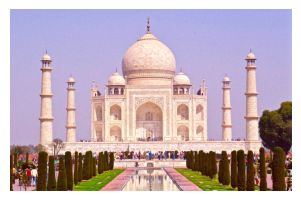

In [8]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(uni_img)
plt.axis('off')

### Question2

(-0.5, 252.5, 198.5, -0.5)

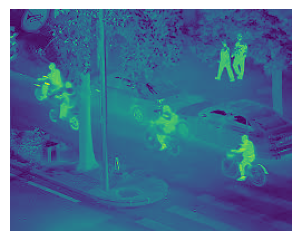

In [9]:
image2 = Image.open(r'NightVision.jpg')
image2 = image2.convert("L")
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.axis('off')

In [10]:
# Get the dimensions of the image
width, height = image2.size

print("Width:", width)
print("Height:", height)
print(width*height)

Width: 253
Height: 199
50347


In [11]:
print(image2.size)

(253, 199)


In [12]:
og_pixels = np.array(image2) 
print(og_pixels.shape)
x=og_pixels.flatten() #image slicing into 1D 
print(x.shape)

(199, 253)
(50347,)


print(og_pixels)

print(x)

(array([111.,  22.,  23.,  31.,  18.,  27.,  49.,  40.,  43.,  40.,  48.,
         64.,  65., 103., 104., 110., 122., 126., 141., 153., 187., 178.,
        161., 178., 186., 185., 201., 217., 219., 189., 214., 221., 245.,
        240., 254., 247., 295., 283., 306., 351., 358., 352., 353., 317.,
        360., 349., 397., 345., 359., 412., 434., 400., 418., 442., 463.,
        464., 522., 508., 534., 508., 542., 590., 533., 537., 543., 500.,
        562., 513., 530., 552., 573., 519., 585., 596., 610., 637., 636.,
        655., 726., 786., 807., 901., 802., 912., 852.,   0., 941., 728.,
        686., 668., 639., 645., 592., 621., 598., 578., 527., 479., 478.,
        408., 408., 402., 397., 405., 363., 375., 362., 413., 350., 357.,
        309., 277., 288., 253., 263., 234., 222., 234., 204., 224., 228.,
        171., 181., 156., 146., 165., 122., 131., 133., 119., 114., 102.,
         77., 117.,  86.,  83., 102.,  86.,  66.,  77.,  53.,  72.,  68.,
         63.,  50.,  55.,  40.,  48., 

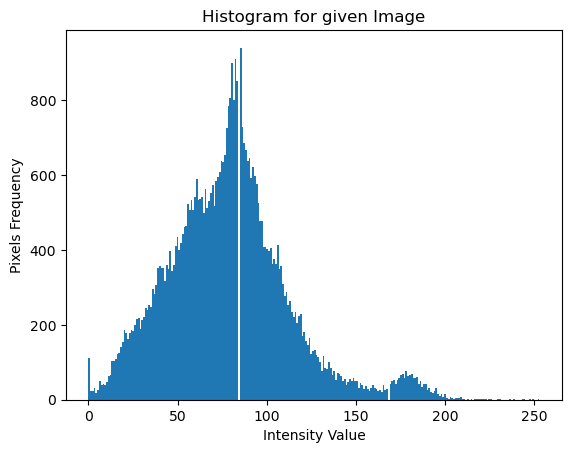

In [13]:
plt.title("Histogram for given Image")
plt.xlabel("Intensity Value")
plt.ylabel("Pixels Frequency")
plt.hist(x,bins=256)

In [14]:
from IPython.display import display, Math, Latex
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

In [15]:
#histogram function
og_pixels = np.asarray(image2) 
flat = og_pixels.flatten() #image slicing into 1D 
def get_histogram(image, bins):
    histogram = np.zeros(bins) # array with size of bins, set to zeros
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    return histogram

hist = get_histogram(flat, 256)

hist

In [16]:
'''cumulative sum function / cumulative density function
 the sum of all values in the histogram up to that point, 
 taking into account all previous values.'''
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)
cdf = cumsum(hist)

In [17]:
cdf.shape

(256,)

cdf

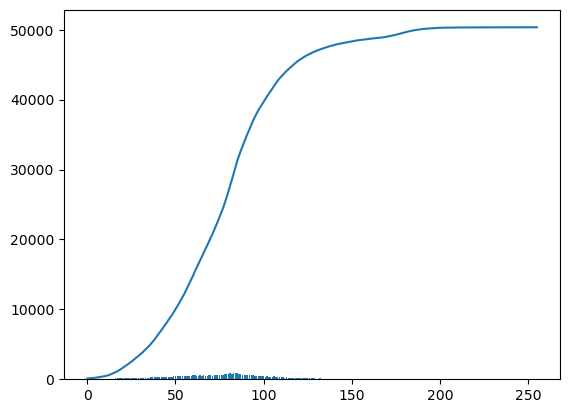

In [18]:
x_axis = np.arange(0,256)
plt.bar(x_axis,hist)
plt.plot(x_axis,cdf)
plt.show()

In [19]:
'''We’re going to be matching these values to our original image in the 
final step, so we have to normalize them to conform to a range of 0–255.'''
# numerator & denominator
nj = (cdf - cdf.min()) * 255
N = cdf.max() - cdf.min()
cdf_norm = nj / N # re-normalize the cumsum

# cast it back to uint8 as can't use floating point values in images
cdf_norm = cdf_norm.astype('uint8')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


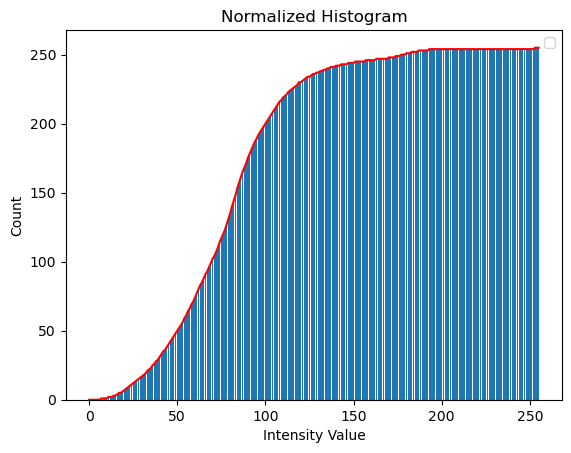

In [20]:
x_axis = np.arange(0,256)
plt.bar(x_axis,cdf_norm)
plt.plot(x_axis,cdf_norm,color='red')
plt.title('Normalized Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend() 
plt.show()

#### Histogram Equalization

In [21]:
''' get the value from cumulative sum for every index in flat, 
and set that as img_new'''
img_new = cdf_norm[flat]
img_new

array([ 0,  2, 10, ..., 46, 46, 46], dtype=uint8)

In [22]:
print(img_new.shape)
#img_new = np.reshape(img_new, image2.size)
# Get the unique intensity values and their counts
intensity_values, counts = np.unique(img_new, return_counts=True)

(50347,)


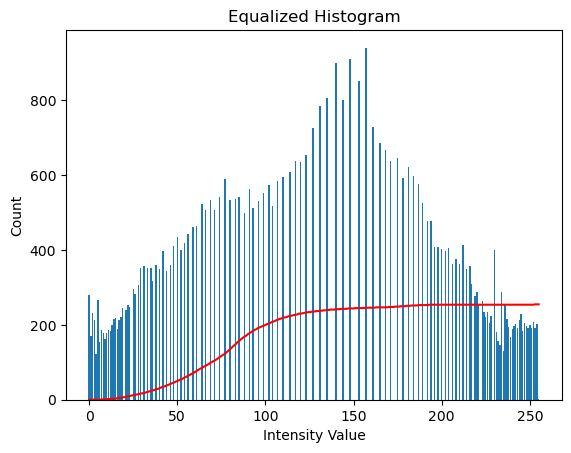

In [23]:
x_axis = np.arange(0,256)
plt.bar(intensity_values, counts) #much more evenly distributed histogram
plt.plot(x_axis,cdf_norm,color='red')
plt.title('Equalized Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.show()

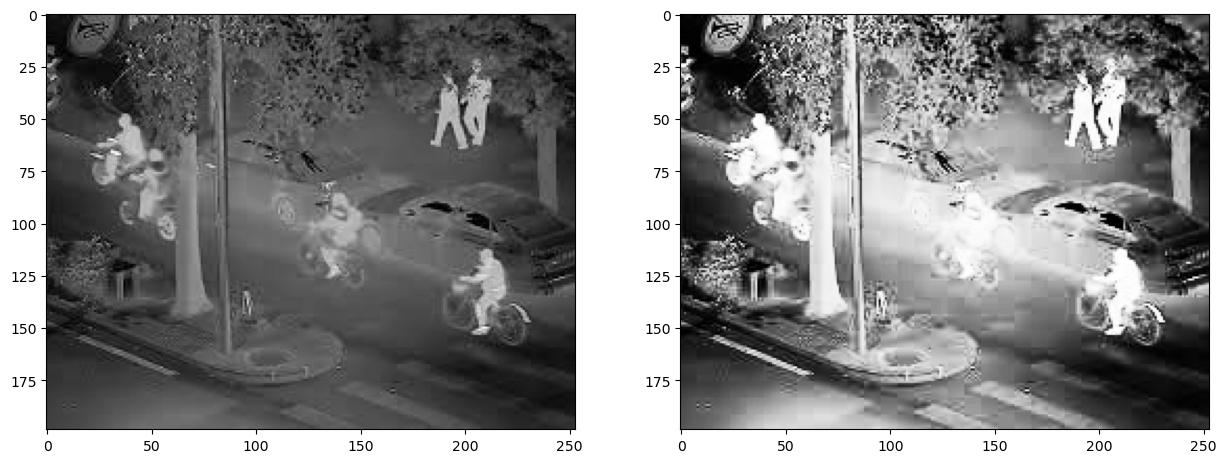

In [24]:
# put array back into original shape since we flattened it
img2 = np.asarray(image2)
img_new = np.reshape(img_new, img2.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img2, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

#### Histogram Matching

In [25]:
def find_value_target(val, target_arr):
    # Find the index of the nearest value in target_arr to val
    idx = np.abs(target_arr - val).argmin()
    return target_arr[idx]

In [26]:
def match_histogram(img1, img2):
    # Compute histograms for both images
    hist_img1, _ = np.histogram(img1.flatten(), bins=256, range=(0, 256))
    hist_img2, _ = np.histogram(img2.flatten(), bins=256, range=(0, 256))

    # Compute cumulative distribution functions (CDFs) for both histograms
    cdf_img1 = hist_img1.cumsum()
    cdf_img2 = hist_img2.cumsum()

    # Normalize the CDFs
    cdf_img1 = (cdf_img1 - cdf_img1.min()) * 255 / (cdf_img1.max() - cdf_img1.min())
    cdf_img2 = (cdf_img2 - cdf_img2.min()) * 255 / (cdf_img2.max() - cdf_img2.min())

    # Initialize enhanced image with the same shape as img1
    en_img = np.zeros_like(img1)

    # Map intensity values from img1 to img2's histogram
    for val in range(256):
        key = find_value_target(val, cdf_img2)
        en_img[img1 == val] = key

    return en_img

In [27]:
# Assuming img2 and img_new are already defined
en_img = match_histogram(img2, img_new)

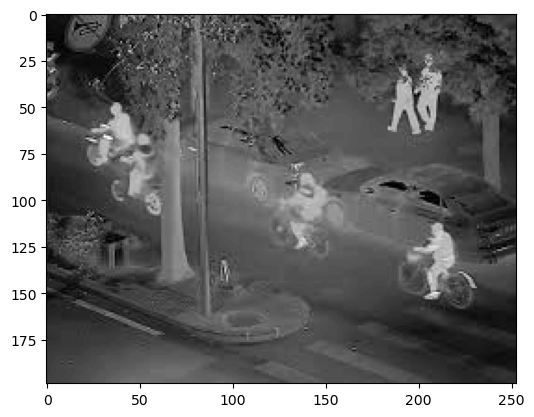

In [28]:
plt.imshow(en_img, cmap='gray')

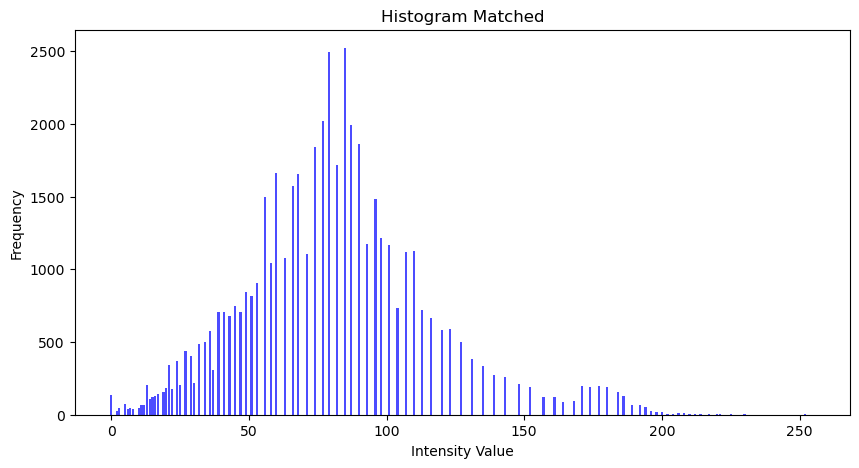

In [29]:
# Compute histogram of en_img
hist, _ = np.histogram(en_img.flatten(), bins=256, range=(0, 256))

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.bar(np.arange(256), hist, color='blue', alpha=0.7)
plt.title('Histogram Matched')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()